In [9]:
import os

from dotenv import load_dotenv

load_dotenv()
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
model_id = "gemini-1.5-flash"
assert GOOGLE_API_KEY is not None

In [4]:
from google import genai

prompt = "自己紹介をしてくれますか？"
model_id = "gemini-1.5-flash"

client = genai.Client(api_key=GOOGLE_API_KEY)
response = client.models.generate_content(model=model_id, contents=prompt)

response.text

'私はGoogleによってトレーニングされた、大規模言語モデルです。\n\n簡単に言うと、膨大なテキストデータから学習した、高度なチャットボットです。様々な情報を処理し、質問に答えたり、テキストを生成したり、翻訳したりすることができます。\n\n私の強みは、情報検索と要約、文章作成、翻訳、様々なスタイルのテキスト生成などです。ただし、常に学習中であり、完璧ではありません。私の回答には不正確な情報が含まれる可能性があることをご理解ください。\n\n私は感情や意識を持っておらず、人間のように思考するわけではありません。私の目的は、ユーザーからの質問に役立つ情報を提供することです。\n\n何か質問があれば、お気軽にお尋ねください。\n'

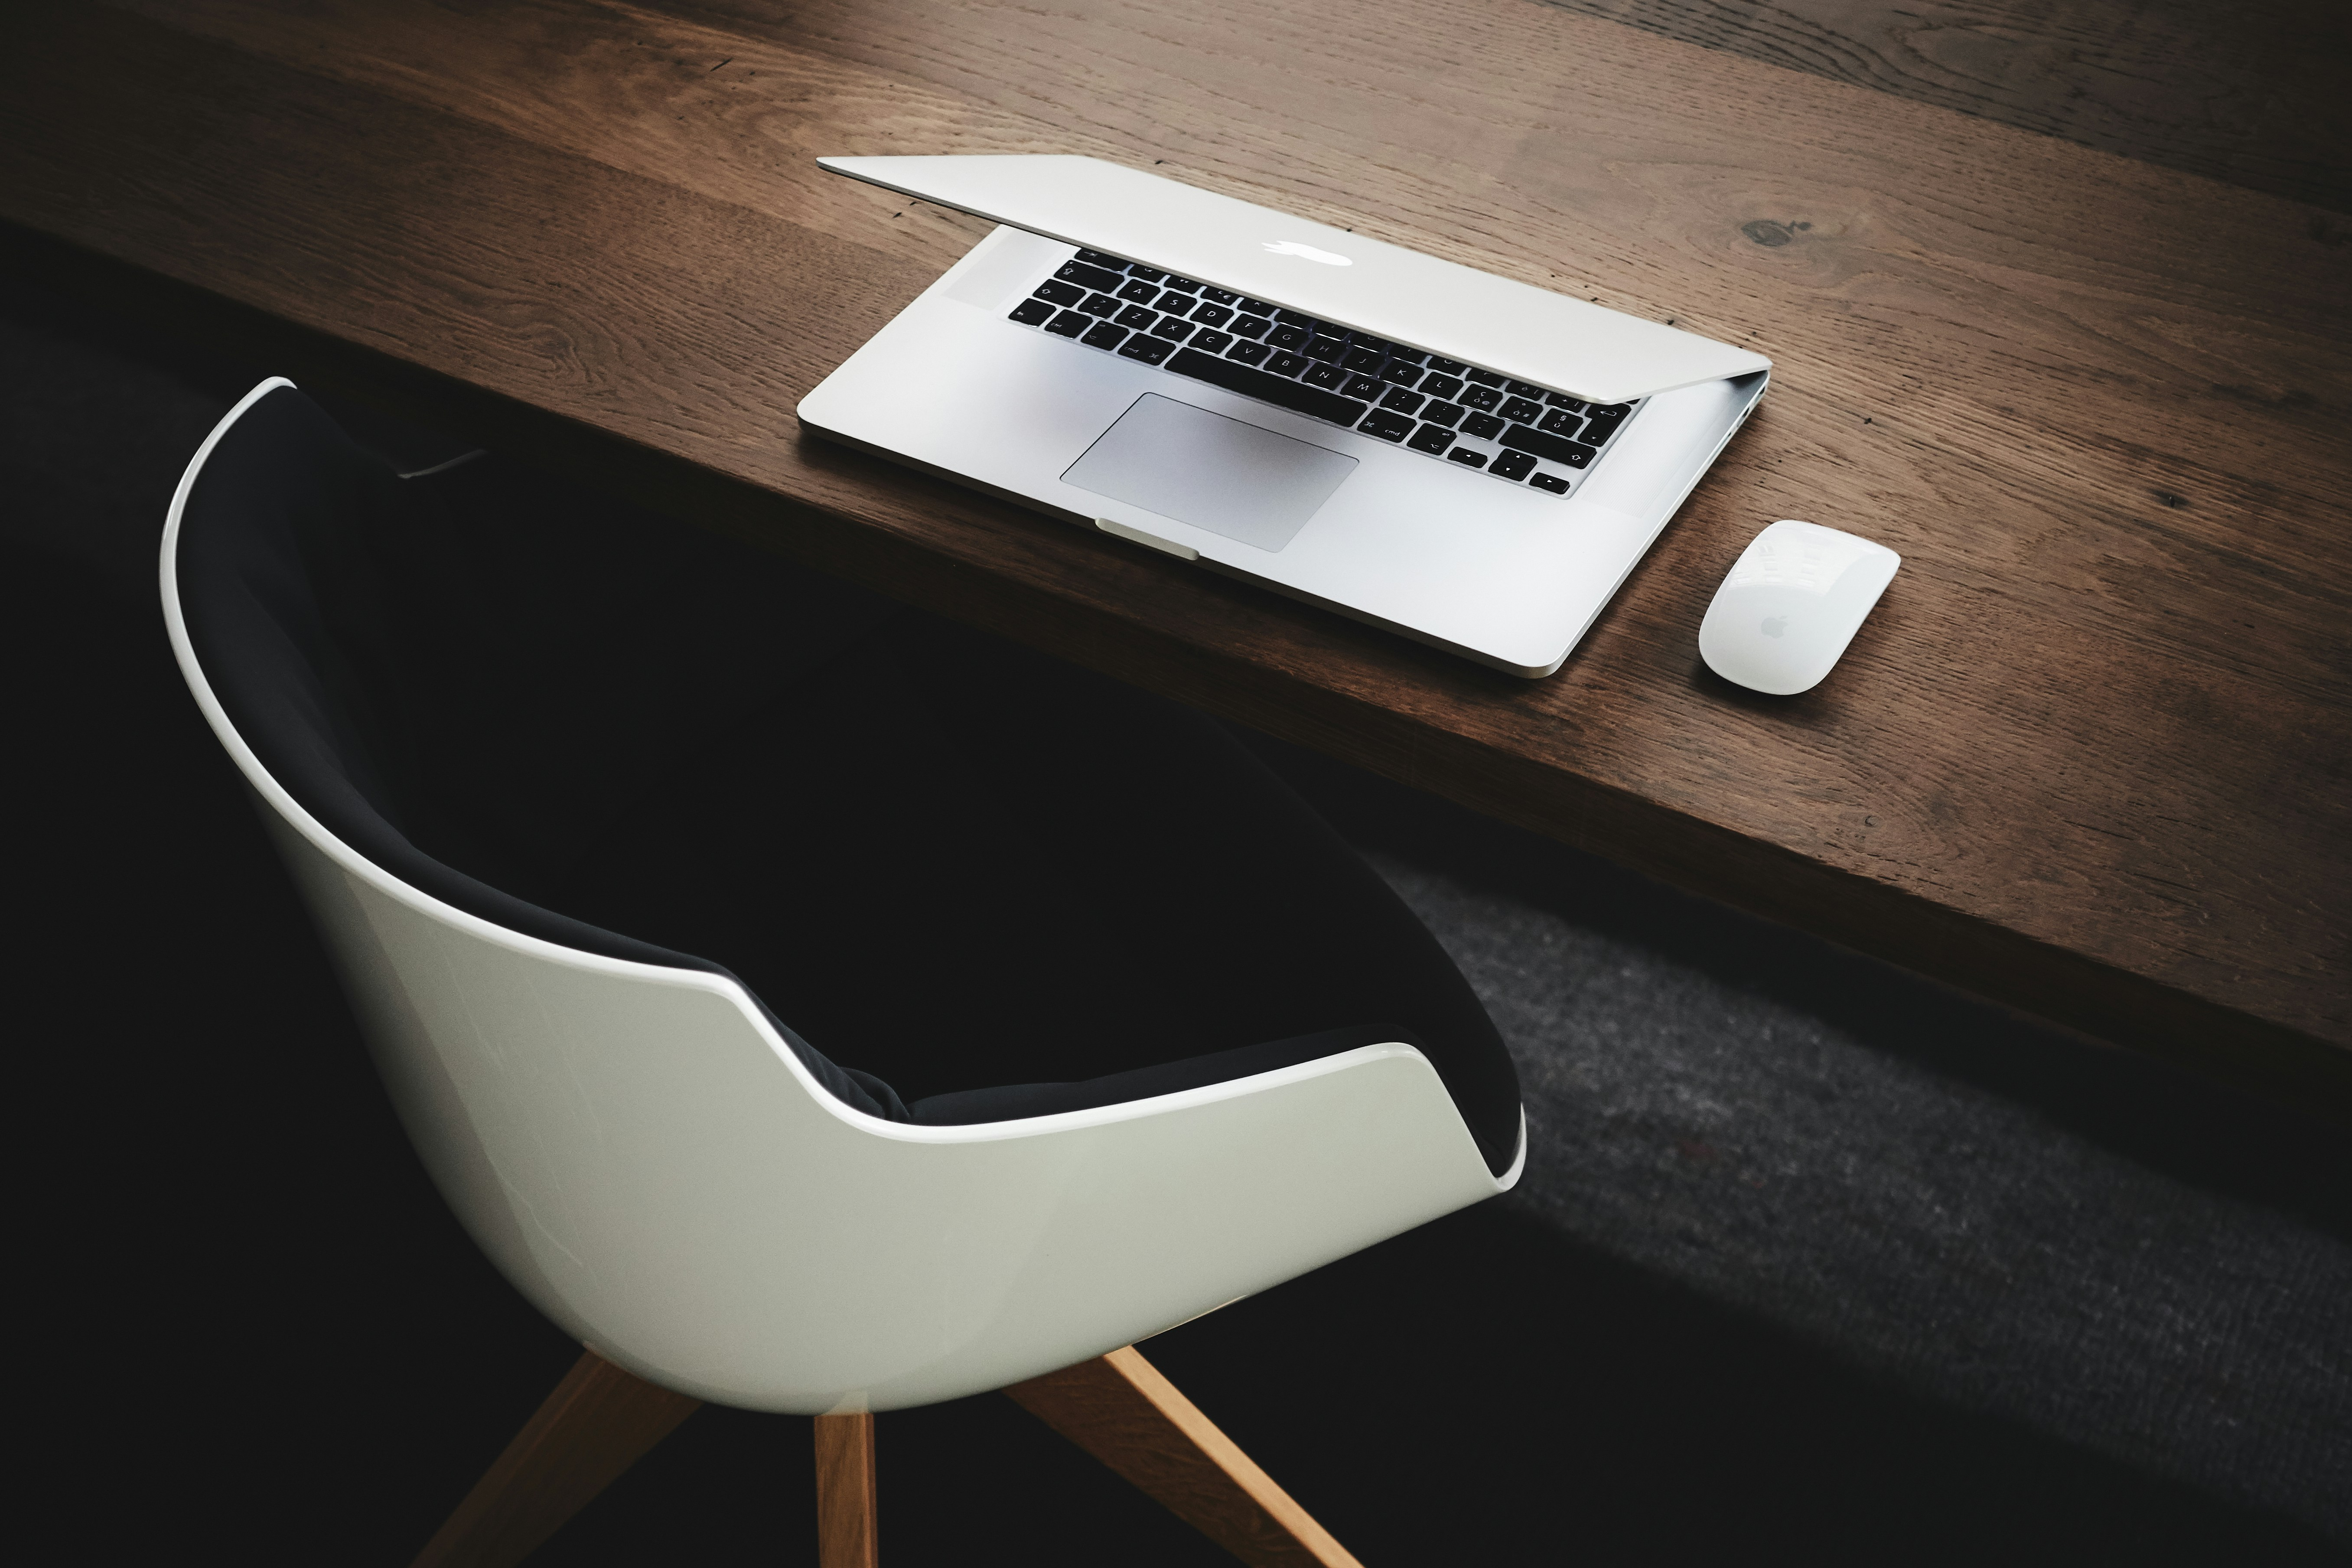

In [ ]:
import os
from IPython.display import Image, display

image_a_path = "images/luca-bravo-9l_326FISzk-unsplash.jpg"

if not os.path.exists(image_a_path):
    raise FileNotFoundError(f"Image file not found: {image_a_path}")

with open(image_a_path, "rb") as image_file:
    image_a = image_file.read()

# display the image
display(Image(image_a_path))

In [ ]:
from google.genai import types

# AIに画像について質問
response_a = client.models.generate_content(
    model=model_id,
    contents=[
        "この画像に写っているものを詳しく説明してください",
        types.Part.from_bytes(data=image_a, mime_type="image/jpeg"),
    ],
)

print(response_a.text)

#### 先程と別の画像を使って質問する

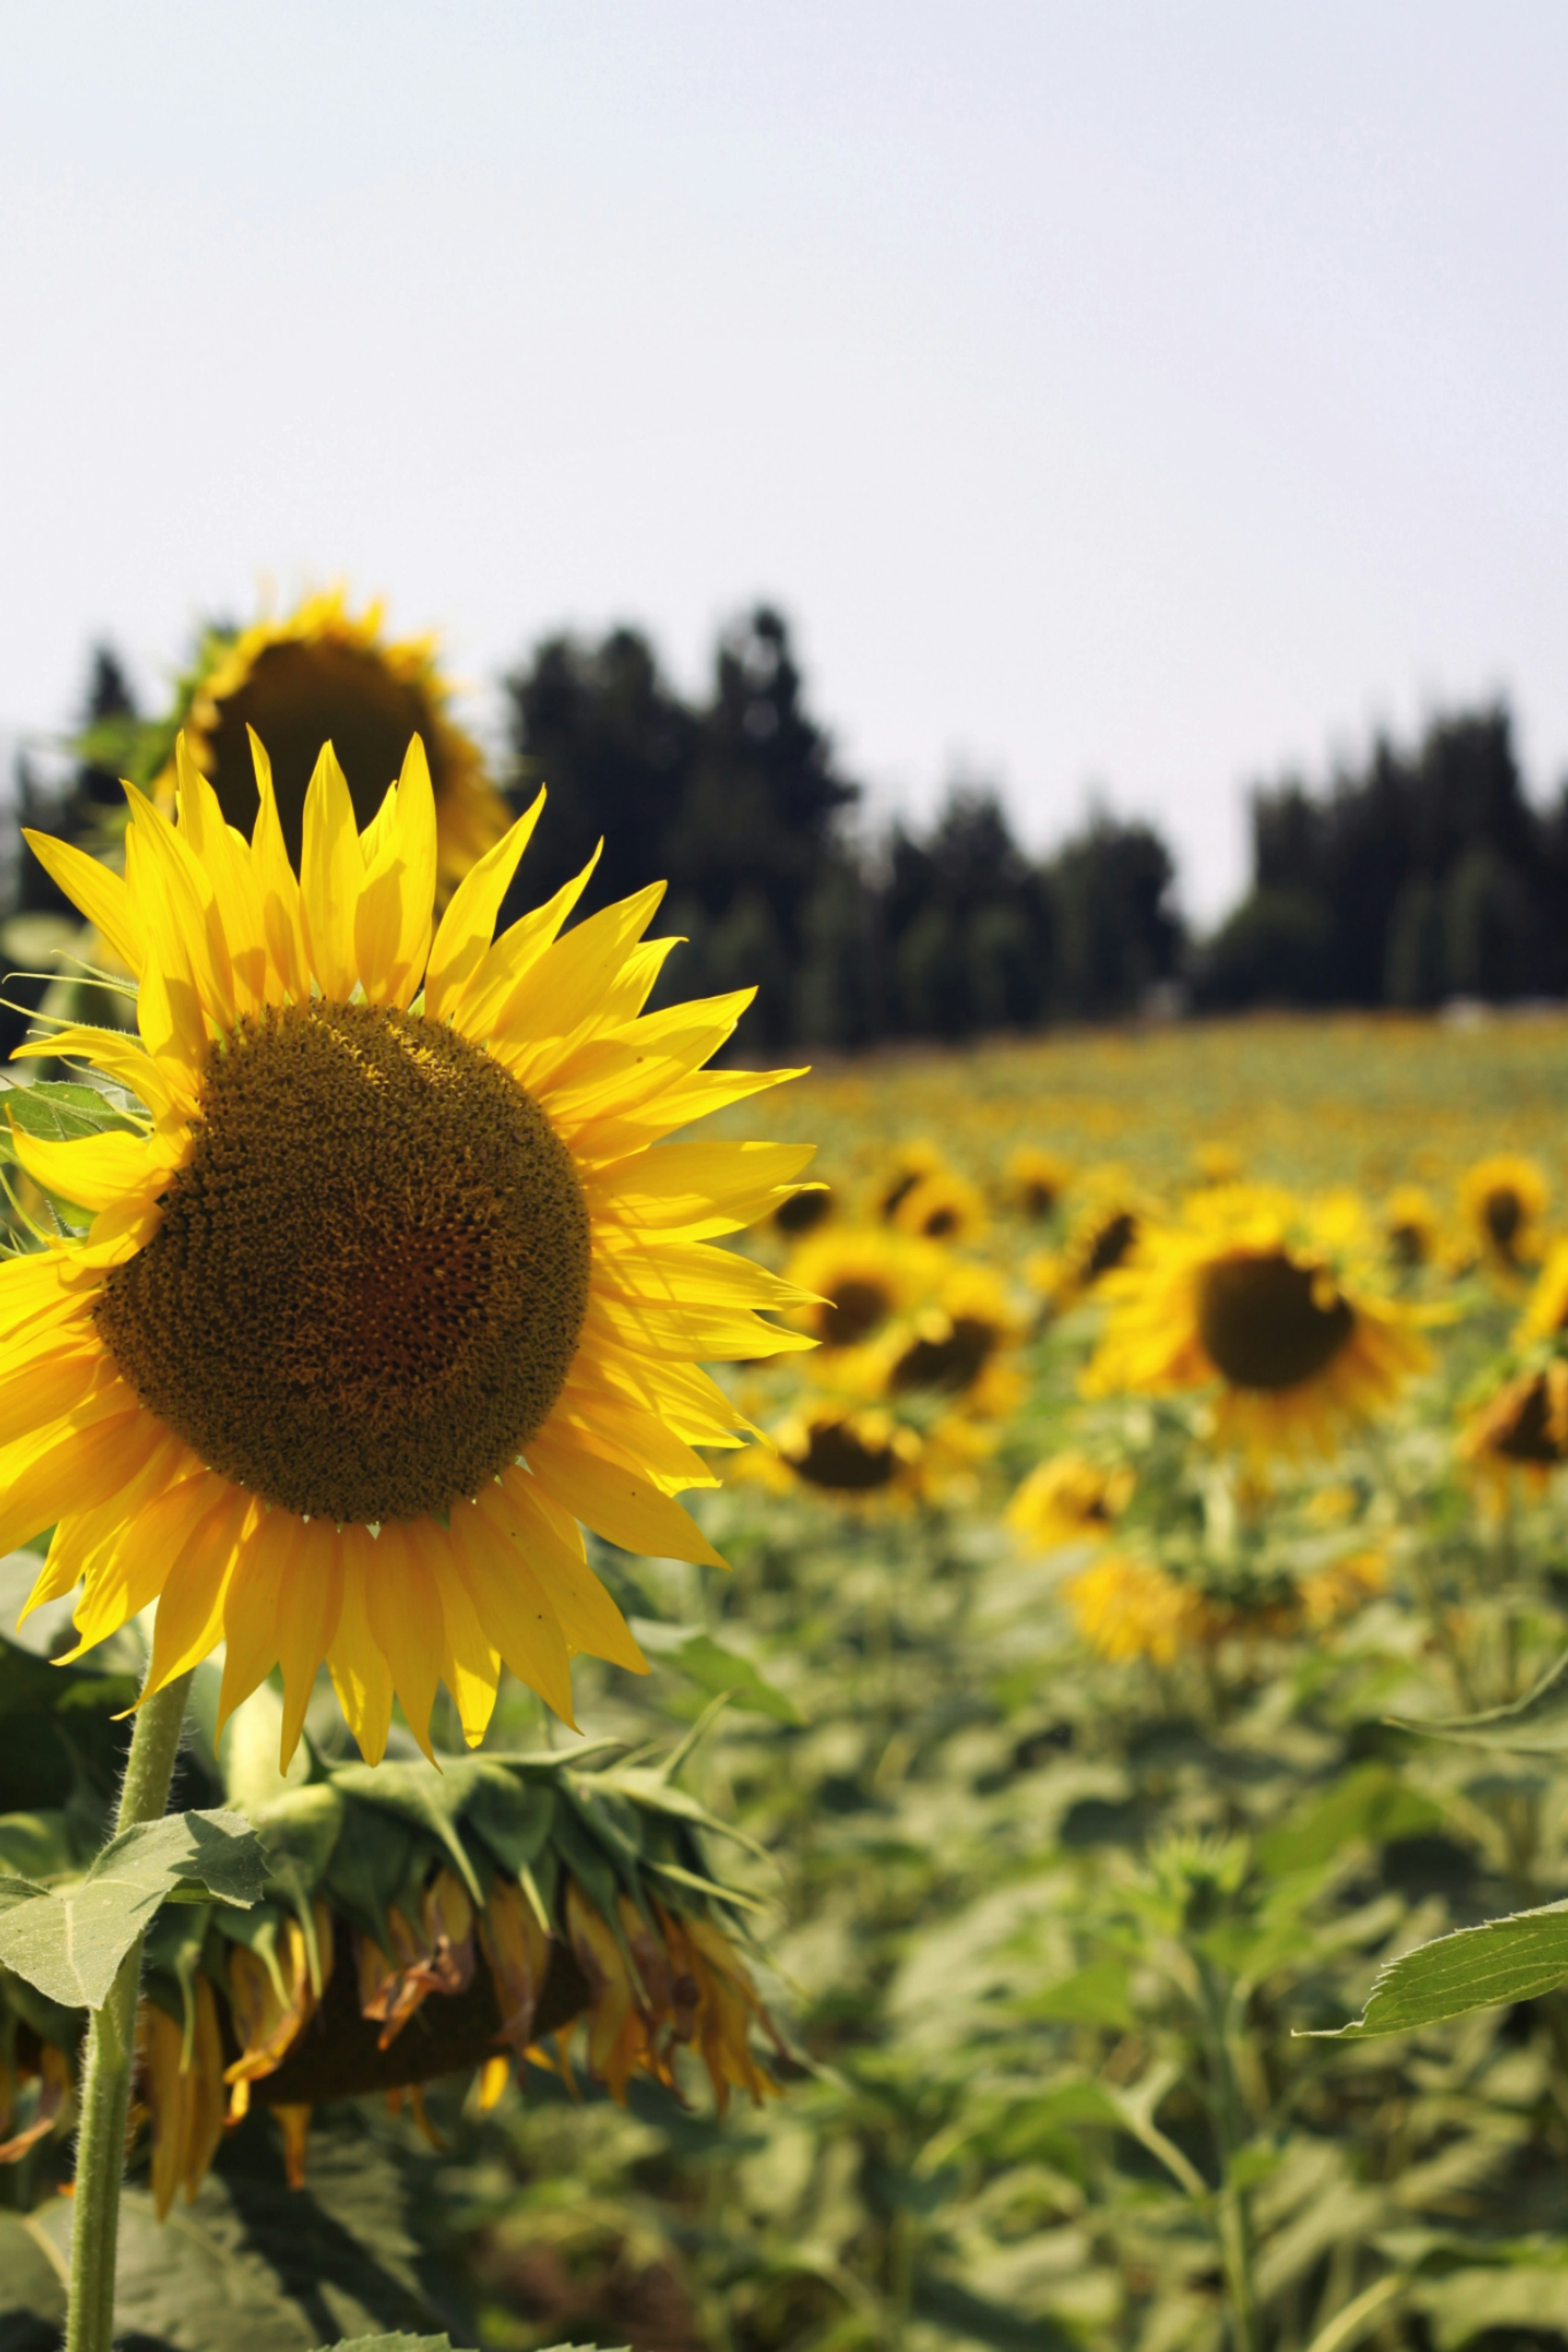

In [16]:
image_b_path = "images/zeynep-sumer-lk3F07BN8T8-unsplash.jpg"

if not os.path.exists(image_b_path):
    raise FileNotFoundError(f"Image file not found: {image_b_path}")

with open(image_b_path, "rb") as image_file:
    image_b = image_file.read()

# display the second image
display(Image(image_b_path))

In [17]:
from google.genai import types

# AIに画像について質問
response_b = client.models.generate_content(
    model=model_id,
    contents=[
        "この画像に写っているものを詳しく説明してください",
        types.Part.from_bytes(data=image_b, mime_type="image/jpeg"),
    ],
)

print(response_b.text)


はい、画像の内容を説明します。

この画像は、ヒマワリ畑を前景から奥まで写した写真です。前景には、大きく鮮やかな黄色のヒマワリが1輪大きく写っており、その背後には、たくさんのヒマワリがぼやけて写っています。

前景のヒマワリは、明るい光の中で太陽に向かって咲いており、その鮮やかな黄色と濃い茶色の芯がはっきりと見えます。花びらは大きく、元気いっぱいで、少し影があり、リアルな感じがします。茎は緑色で、葉は緑色で、わずかに毛が生えています。

背景には、多くのヒマワリが密集して植えられており、ぼやけていますが、畑の広さがわかります。ヒマワリは、さまざまな生育段階に見え、花を咲かせたものもあれば、まだつぼみのものもあります。

背景には、緑の樹木が点在する、遠くの風景がかすかに見えます。空は明るくて澄んでおり、全体的に晴れ渡った日差しが感じられる写真です。全体的な雰囲気は、平和で、自然の美しさが感じられる、穏やかなものです。


#### URL画像の処理

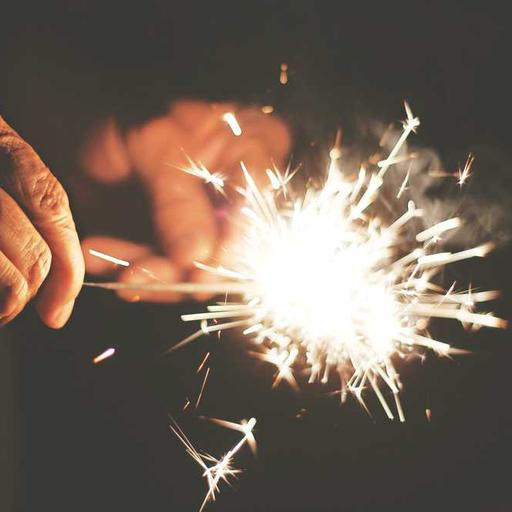

In [22]:
import requests
from io import BytesIO

url = "https://picsum.photos/512/512"
response_img = requests.get(url)
response_img.raise_for_status()

buffer = BytesIO(response_img.content)

# バッファの内容を直接表示
display(Image(data=buffer.read()))


##### URL画像の処理方法

In [ ]:
from google.genai import types

# AIに画像について質問
response_c = client.models.generate_content(
    model=model_id,
    contents=[
        "この画像に写っているものを詳しく説明してください",
        types.Part.from_bytes(data=response_img.content, mime_type="image/jpeg"),
    ],
)

print(response_c.text)


画像は、人が点火して燃えている線香花火を手に持っている様子を捉えています。花火は明るく輝いており、周囲は暗闇に包まれています。手はかすんでいますが、線香花火の光が強く放たれていることがわかります。画像全体は、暖かく祝祭的な雰囲気を感じさせます。


#### 構造化出力

In [47]:
from google import genai
from google.genai import types
from pydantic import BaseModel, Field


# データ構造を定義（Fieldで詳細な説明を追加）
class BookInfo(BaseModel):
    title: str = Field(description="本のタイトル")
    author: str = Field(description="著者名")
    genre: str = Field(description="ジャンル（小説、ノンフィクション、ビジネス書など）")
    publication_year: int = Field(description="出版年", ge=1900, le=2025)
    pages: int = Field(description="ページ数（1以上）", ge=1)
    summary: str = Field(description="本の内容を要約した説明（100文字程度）")


client = genai.Client(api_key=GOOGLE_API_KEY)

response = client.models.generate_content(
    model=model_id,
    contents="面白いSF小説を1冊おすすめしてください",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=BookInfo,
    ),
)

print(response.text)


{"title": "三体", "author": "劉慈欣", "genre": "SF小説", "publication_year": 2008, "pages": 400, "summary": "人類が宇宙文明と接触する物語。地球外知的生命体との出会いと、その後の壮大な戦いを描いた傑作SF小説。緻密な世界観とスケールの大きさ、そして人間の業が絡み合う展開は、読者を圧倒する。"}


In [40]:
import json

data = json.loads(response.text)
print(data)

{'name': 'トラットリア ラ・ベットラ ダ・オチアイ', 'cuisine_type': 'イタリアン', 'price_range': '中価格（3000-8000円）', 'rating': 4.5, 'popular_dishes': ['自家製パスタ', 'トリュフを使った料理', 'ピッツァ', 'シーフード料理', '季節の野菜を使った料理'], 'location': '東京都港区北青山'}


In [48]:
from pydantic import BaseModel, Field
from typing import List, Optional
from enum import Enum


class DifficultyLevel(str, Enum):
    BEGINNER = "初級"
    INTERMEDIATE = "中級"
    ADVANCED = "上級"


class SkillInfo(BaseModel):
    name: str = Field(description="スキル名")
    level: DifficultyLevel = Field(description="習得難易度")
    description: str = Field(description="スキルの説明")


class PersonInfo(BaseModel):
    name: str = Field(description="人物の名前")
    age: int = Field(description="年齢", ge=0, le=120)
    occupation: str = Field(description="職業")
    hobbies: List[str] = Field(description="趣味のリスト（3-5個程度）", max_items=5)
    skills: List[SkillInfo] = Field(description="持っているスキルのリスト")
    bio: str = Field(description="人物の経歴や特徴（150文字程度）")


response = client.models.generate_content(
    model=model_id,
    contents="プログラマーの架空の人物プロフィールを作成してください",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=PersonInfo,
    ),
)

print(response.text)


{"name": "山田太郎", "age": 30, "occupation": "プログラマー", "hobbies": ["読書", "映画鑑賞", "旅行", "ゲーム", "料理"], "skills": [{"name": "Python", "level": "上級", "description": "Pythonを使ったWebアプリケーション開発、データ分析、機械学習の経験あり"}, {"name": "Java", "level": "中級", "description": "Androidアプリ開発経験あり"}, {"name": "JavaScript", "level": "中級", "description": "フロントエンド開発、React、Node.jsを使用"}, {"name": "SQL", "level": "中級", "description": "データベース設計、MySQL、PostgreSQLを使用"}, {"name": "Git", "level": "上級", "description": "Gitを用いたバージョン管理、GitHub、GitLabを使用"}], "bio": "30歳のプログラマー山田太郎です。大学卒業後、システム開発会社に就職し、現在5年間Webアプリケーション開発に携わっています。Python、Java、JavaScript、SQLなど複数のプログラミング言語と、様々な開発ツールに精通しています。常に新しい技術を学び続けることを心がけ、チームワークを大切にしながら、高品質なソフトウェア開発を目指しています。趣味は読書、映画鑑賞、旅行、ゲーム、料理で、休日はこれらの趣味を満喫しています。"}


#### 列挙型（Enum）での制限された回答
特定の選択肢から回答を選んでもらいたい場合は、列挙型を使用できます。

In [42]:
from enum import Enum

class MoodEnum(Enum):
    HAPPY = "happy"
    SAD = "sad"
    EXCITED = "excited"
    CALM = "calm"
    CONFUSED = "confused"


response = client.models.generate_content(
    model=model_id,
    contents="明日が休日だと知った時の気持ちを表現してください",
    config=types.GenerateContentConfig(
        response_mime_type="text/x.enum",
        response_schema=MoodEnum,
    ),
)

print(response.text)


happy


### ツールの使用（Function Calling）
AIに外部の関数やツールを呼び出してもらう機能は、非常に強力です。天気情報の取得、データベースの検索、計算処理など、AIが自動的に適切なツールを選んで実行してくれます。

In [50]:
from zoneinfo import ZoneInfo
from datetime import datetime


def get_current_time() -> str:
    """現在の時刻を取得します。"""
    now = datetime.now(tz=ZoneInfo("Asia/Tokyo"))
    return now.strftime("%Y年%m月%d日 %H時%M分")


def calculate_area(length: float, width: float) -> float:
    """長方形の面積を計算します。

    Args:
        length: 長さ（メートル）
        width: 幅（メートル）
    """
    return length * width

In [52]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)
prompt = "長方形の面積を計算してください。縦の長さは5メートル、横の長さは3メートルです。"

response = client.models.generate_content(
    model=model_id,
    contents=prompt,
    config=types.GenerateContentConfig(
        tools=[
            get_current_time,
            calculate_area,
        ]
    )
)

print(response.text)

長方形の面積は15平方メートルです。



#### 自動関数呼び出しが行われないパターン

AIが関数を呼び出す必要がないと判断した場合

In [53]:
prompt = "自己紹介をしてくれますか？"

response = client.models.generate_content(
    model=model_id,
    contents=prompt,
    config=types.GenerateContentConfig(
        tools=[
            get_current_time,
            calculate_area,
        ]
    ),
)

print(response.text)


私はGeminiという、Googleによって開発された大規模言語モデルです。質問に答えたり、さまざまなタスクを実行したりすることができます。  どうぞ、ご質問ください。



関数の説明が不適切な場合

```python
# ❌ 悪い例：説明が不十分
def bad_function(x, y):
    return x * y

# ✅ 良い例：詳細な説明
def calculate_area(length: float, width: float) -> float:
    """長方形の面積を計算します。
    
    Args:
        length: 長さ（メートル）
        width: 幅（メートル）
    
    Returns:
        面積（平方メートル）
    """
    return length * width
```

自動関数呼び出しを無効にした場合

In [57]:
prompt = "長方形の面積を計算してください。縦の長さは5メートル、横の長さは3メートルです。"

response = client.models.generate_content(
    model=model_id,
    contents=prompt,
    config=types.GenerateContentConfig(
        tools=[
            get_current_time,
            calculate_area,
        ],
        automatic_function_calling=types.AutomaticFunctionCallingConfig(
            disable=True  # 自動関数呼び出しを無効化
        )
    ),
)

print(response.function_calls)


[FunctionCall(id=None, args={'width': 3, 'length': 5}, name='calculate_area')]
